In [1]:
%cd /Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients

/Users/kieranschubert/Desktop/BTK/btk_mac_os/Individual_patients


# DATA IMPORTATION AND FORMATTING

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  

from __future__ import division
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np

import seaborn as sns

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model

Using TensorFlow backend.


In [4]:
cp = pd.read_csv("CP_merged.csv")
fd = pd.read_csv("FD_merged.csv")
itw = pd.read_csv("ITW_merged.csv")

In [ ]:
print(cp.shape)
print(fd.shape)
print(itw.shape)

In [5]:
cp = cp.dropna(axis=0, how='any')
fd = fd.dropna(axis=0, how='any')
itw = itw.dropna(axis=0, how='any')
print(cp.shape)
print(fd.shape)
print(itw.shape)

(12140, 101)
(6319, 101)
(4993, 101)


### Unique labels

In [6]:
fd = fd.replace('Foot_Off_GS_Right', 'Foot Off_Right')

In [7]:
data = pd.DataFrame(np.vstack((cp, fd, itw)), columns=list(cp.columns.values))
print(data.shape)

(23452, 101)


In [ ]:
print(np.unique(cp.iloc[:, -1]))
print(np.unique(fd.iloc[:, -1]))
print(np.unique(itw.iloc[:, -1]))

In [8]:
data = data.replace('0_0', 0)
data = data.replace('Foot Off_Left', 1)
data = data.replace('Foot Off_Right', 2)
data = data.replace('Foot Strike_Left', 3)
data = data.replace('Foot Strike_Right', 4)

In [9]:
print(np.unique(data.iloc[:, -1]))

[0 1 2 3 4]


### Features

In [ ]:
list(cp.columns.values)[:5]

# EDA

In [ ]:
names = list(lag_2.columns) + list(X_subset.columns[1:-1])
mat = pd.DataFrame(np.hstack((lag_2, data[list(X_subset.columns[1:-1])])),
                  columns=names)
mat_lag2 = mat.corr().iloc[:12, 12:]

plt.imshow(mat_lag2, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(mat_lag2.columns))]
plt.xticks(tick_marks, mat_lag2.columns, rotation='vertical')
plt.yticks(tick_marks, list(mat_lag2.index))
plt.title('lag-2 correlation')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag2_corr.png')
plt.show()

In [ ]:
correl.head()

In [ ]:
correl = data.iloc[:, 1:34].corr()
plt.imshow(correl, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(correl.columns))]
plt.xticks(tick_marks, correl.columns, rotation='vertical')
plt.yticks(tick_marks, correl.columns)
plt.title('Predictor correlation (x)')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/data_corr_x.png')
plt.show()

In [ ]:
correl = data.iloc[:, 34:67].corr()
plt.imshow(correl, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(correl.columns))]
plt.xticks(tick_marks, correl.columns, rotation='vertical')
plt.yticks(tick_marks, correl.columns)
plt.title('Predictor correlation (y)')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/data_corr_y.png')
plt.show()

In [ ]:
correl = data.iloc[:, 67:-1].corr()
plt.imshow(correl, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(correl.columns))]
plt.xticks(tick_marks, correl.columns, rotation='vertical')
plt.yticks(tick_marks, correl.columns)
plt.title('Predictor correlation (z)')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/data_corr_z.png')
plt.show()

In [ ]:
cond_corr = data.iloc[:,1:].groupby(by='labels').get_group(0).corr()

In [ ]:
print((data.iloc[:,-1] == 0).sum())
print((data.iloc[:,-1] == 1).sum())
print((data.iloc[:,-1] == 2).sum())
print((data.iloc[:,-1] == 3).sum())
print((data.iloc[:,-1] == 4).sum())

In [ ]:
(data.iloc[:,-1] != 0).sum() / len(data.iloc[:,-1])

In [ ]:
plt.hist(data.iloc[:,-1])
plt.title('Label Distribution')    
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/label_distribution.png')
plt.show()

In [ ]:
for i in range(1, 100):
    sns.kdeplot(np.array(data.iloc[:,i]), bw=0.5)
plt.title('Predictor Densities')    
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/predictor_densities.png')

In [ ]:
plt.hist(np.mean(data.iloc[:, 1:], axis=0), bins=len(data.columns))
plt.title('Predictor Means')
plt.xlabel('Mean')
plt.ylabel('Count')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/predictor_means.png')
plt.show()

In [ ]:
plt.hist(np.std(data.iloc[:, 1:], axis=0), bins=len(data.columns))
plt.title('Predictor std dev')
plt.xlabel('Std dev')
plt.ylabel('Count')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/predictor_std.png')
plt.show()

# DATA SPLITTING

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:, 1:-1], data.iloc[:,-1], test_size=0.2, random_state=0, stratify=data.iloc[:,-1])

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

# Modelling

## NAIVE BAYES CLASSIFIER FULL DATASET

In [11]:
clf_gnb = GaussianNB()
y_pred_gnb = clf_gnb.fit(X_train_scaled, y_train).predict(X_test_scaled)
gnb_acc = (y_pred_gnb == y_test).sum()/len(y_pred_gnb)
print("Classification accuracy GNB: %.2f" % gnb_acc)

Classification accuracy GNB: 0.60


In [12]:
(y_pred_gnb != 0).sum()

1827

In [13]:
(y_test != 0).sum()

183

In [14]:
(y_pred_gnb != 0).sum() / (y_test != 0).sum()

9.98360655737705

In [15]:
(y_pred_gnb[np.where(y_pred_gnb != 0)] == y_test.iloc[np.where(y_pred_gnb != 0)]).sum() / len((y_pred_gnb[np.where(y_pred_gnb != 0)]))

0.022441160372194856

# kNN

In [16]:
#scaler = StandardScaler()  
#X_train_scaled = scaler.fit_transform(X_train)  
#X_test_scaled = scaler.fit_transform(X_test)

clf_knn = KNeighborsClassifier(n_neighbors=5)  
y_pred_knn = clf_knn.fit(X_train_scaled, y_train).predict(X_test_scaled)  

knn_acc = (y_pred_knn == y_test).sum()/len(y_pred_knn)
print("Classification accuracy kNN: %.2f" % knn_acc)

#print(confusion_matrix(y_test, y_pred_knn))  
#print(classification_report(y_test, y_pred_knn)) 

Classification accuracy kNN: 0.96


In [17]:
(y_pred_knn != 0).sum()

0

In [18]:
(y_pred_knn != 0).sum() / (y_test != 0).sum()

0.0

In [19]:
(y_pred_knn[np.where(y_pred_knn != 0)] == y_test.iloc[np.where(y_pred_knn != 0)]).sum() / len((y_pred_knn[np.where(y_pred_knn != 0)]))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# SOFTMAX CLASSIFICATION

In [20]:
clf_mnr = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000000, multi_class='multinomial').fit(X_train_scaled, y_train)



In [21]:
y_pred_mnr = clf_mnr.predict(X_test_scaled)
mnr_acc = (y_pred_mnr == y_test).sum()/len(y_pred_mnr)
print("Classification accuracy Multinomial Regression : %.2f" % mnr_acc)

Classification accuracy Multinomial Regression : 0.96


In [22]:
(y_pred_mnr != 0).sum()

0

In [23]:
(y_pred_mnr != 0).sum() / (y_test != 0).sum()

0.0

In [24]:
(y_pred_mnr[np.where(y_pred_mnr != 0)] == y_test.iloc[np.where(y_pred_mnr != 0)]).sum() / len((y_pred_mnr[np.where(y_pred_mnr != 0)]))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# SVM

## DO rbf, linear, gaussian, poly, c param, gamma param, etc. => hyper-param tuning

In [25]:
clf_svm = svm.SVC(gamma='scale', kernel='rbf', decision_function_shape='ovo')
clf_svm.fit(X_train_scaled, y_train.values.ravel()) 
y_pred_svm = clf_svm.predict(X_test_scaled)

In [26]:
svm_acc = (y_pred_svm == y_test).sum()/len(y_pred_svm)
print("Classification accuracy SVM : %.2f" % svm_acc)

Classification accuracy SVM : 0.96


In [27]:
(y_pred_svm != 0).sum()

0

In [28]:
(y_pred_svm != 0).sum() / (y_test != 0).sum()

0.0

In [29]:
(y_pred_svm[np.where(y_pred_svm != 0)] == y_test.iloc[np.where(y_pred_svm != 0)]).sum() / len((y_pred_svm[np.where(y_pred_svm != 0)]))

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# LDA

In [30]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_scaled, y_train.values.ravel())  
y_pred_lda = clf_lda.predict(X_test_scaled)

In [31]:
lda_acc = (y_pred_lda == y_test).sum()/len(y_pred_lda)
print("Classification accuracy LDA : %.2f" % lda_acc)

Classification accuracy LDA : 0.96


In [32]:
(y_pred_lda != 0).sum()

32

In [33]:
(y_pred_lda != 0).sum() / (y_test != 0).sum()

0.17486338797814208

In [34]:
(y_pred_lda[np.where(y_pred_lda != 0)] == y_test.iloc[np.where(y_pred_lda != 0)]).sum() / len((y_pred_lda[np.where(y_pred_lda != 0)]))

0.09375

# QDA

In [35]:
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train_scaled, y_train)
y_pred_qda = clf_qda.predict(X_test_scaled)

In [36]:
qda_acc = (y_pred_qda == y_test).sum()/len(y_pred_qda)
print("Classification accuracy LDA : %.2f" % qda_acc)

Classification accuracy LDA : 0.69


In [37]:
(y_pred_qda != 0).sum()

1359

In [38]:
(y_pred_qda != 0).sum() / (y_test != 0).sum()

7.426229508196721

In [39]:
(y_pred_qda[np.where(y_pred_qda != 0)] == y_test.iloc[np.where(y_pred_qda != 0)]).sum() / len((y_pred_qda[np.where(y_pred_qda != 0)]))


0.01545253863134658

# NN model 1

In [ ]:
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

In [40]:
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=5)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=5)

In [41]:
model1 = Sequential()
model1.add(Dense(8, input_dim=99, activation='relu'))
model1.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [42]:
history = model1.fit(X_train_scaled, y_train_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)

Instructions for updating:
Use tf.cast instead.


In [43]:
y_pred_NN1 = model1.predict_classes(X_test_scaled)
(y_pred_NN1 == y_test).sum() / len(y_pred_NN1)

0.9609891281176721

In [44]:
(y_pred_NN1 != 0).sum()

0

In [45]:
(y_pred_NN1 != 0).sum() / (y_test != 0).sum()

0.0

In [46]:
(y_pred_NN1[np.where(y_pred_NN1 != 0)] == y_test.iloc[np.where(y_pred_NN1 != 0)]).sum() / len((y_pred_NN1[np.where(y_pred_NN1 != 0)]))


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# CV NN1

In [47]:
def model_1():
    model = Sequential()
    model.add(Dense(8, input_dim=99, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [48]:
estimator = KerasClassifier(build_fn=model_1, epochs=100, batch_size=256, verbose=False)

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [50]:
results = cross_val_score(estimator, X_train_scaled, y_train_onehot, cv=kfold)
print("Model_1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_1: 96.10% (0.21%)


# NN model 2

In [51]:
model2 = Sequential()
model2.add(Dense(10, input_dim=99, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [52]:
history = model2.fit(X_train_scaled, y_train_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)

In [53]:
y_pred_NN2 = model2.predict_classes(X_test_scaled)
(y_pred_NN2 == y_test).sum() / len(y_pred_NN2)

0.9609891281176721

In [54]:
(y_pred_NN2 != 0).sum()

0

In [55]:
(y_pred_NN2 != 0).sum() / (y_test != 0).sum()

0.0

In [56]:
(y_pred_NN2[np.where(y_pred_NN2 != 0)] == y_test.iloc[np.where(y_pred_NN2 != 0)]).sum() / len((y_pred_NN2[np.where(y_pred_NN2 != 0)]))


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# CV NN2

In [57]:
def model_2():
    model = Sequential()
    model.add(Dense(10, input_dim=99, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [58]:
estimator = KerasClassifier(build_fn=model_2, epochs=100, batch_size=256, verbose=False)

In [59]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [60]:
results = cross_val_score(estimator, X_train_scaled, y_train_onehot, cv=kfold)
print("Model_2: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_2: 96.10% (0.21%)


# NN model 3

In [61]:
model3 = Sequential()
model3.add(Dense(100, input_dim=99, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [62]:
history = model3.fit(X_train_scaled, y_train_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)

In [63]:
y_pred_NN3 = model3.predict_classes(X_test_scaled)
(y_pred_NN3 == y_test).sum() / len(y_pred_NN3)

0.9609891281176721

In [64]:
(y_pred_NN3 != 0).sum()

0

In [65]:
(y_pred_NN3 != 0).sum() / (y_test != 0).sum()

0.0

In [66]:
(y_pred_NN3[np.where(y_pred_NN3 != 0)] == y_test.iloc[np.where(y_pred_NN3 != 0)]).sum() / len((y_pred_NN3[np.where(y_pred_NN3 != 0)]))


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# CV NN3

In [67]:
def model_3():
    model = Sequential()
    model.add(Dense(100, input_dim=99, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [68]:
estimator = KerasClassifier(build_fn=model_3, epochs=100, batch_size=256, verbose=False)

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [70]:
results = cross_val_score(estimator, X_train_scaled, y_train_onehot, cv=kfold)
print("Model_3: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_3: 96.10% (0.21%)


In [ ]:
#plot_model(model)
#plot_model(model, to_file='model.png')

# CROSS VALIDATION SCORES

In [ ]:
gnb_scores = cross_val_score(clf_gnb, data.iloc[:, 1:-1], data.iloc[:, -1], cv=5)
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (gnb_scores.mean(), gnb_scores.std()))
knn_scores = cross_val_score(clf_knn, data.iloc[:, 1:-1], data.iloc[:, -1], cv=5)
print("Accuracy kNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std()))
#mnr_scores = cross_val_score(clf_mnr, data.iloc[:, 1:-1], data.iloc[:, -1], cv=10)
#print("Accuracy MNR: %0.2f (+/- %0.2f)" % (mnr_scores.mean(), mnr_scores.std()))
#svm_scores = cross_val_score(clf_svm, data.iloc[:, 1:-1], data.iloc[:, -1], cv=5)
#print("Accuracy SVM: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std()))
lda_scores = cross_val_score(clf_lda, data.iloc[:, 1:-1], data.iloc[:, -1], cv=5)
print("Accuracy LDA: %0.2f (+/- %0.2f)" % (lda_scores.mean(), lda_scores.std()))
qda_scores = cross_val_score(clf_qda, data.iloc[:, 1:-1], data.iloc[:, -1], cv=5)
print("Accuracy QDA: %0.2f (+/- %0.2f)" % (qda_scores.mean(), qda_scores.std()))

# FEATURE ENGINEERING

Noticed on Mokka that RTOE, LTOE stop moving in x-axis when foot strike
Same for heel (maybe y direction)

- WANT TO ADD A LAGGED TIME SERIES OF FEATURE RTOE, LTOE, RHEE, LHEE, try different lags => past information => when movement in x-axis smaller than threshold => event
- CREATE VARIABLE 1diff, 2diff, 2diff.
- WANT TO ADD RTOE^2, etc. to see if makes models any better

### LAGGING, only using LTOE,RTOE, LHEE, RHEE in x,y,z axis

CAREFUL: need to separate patients with different conditions?

In [71]:
X_subset = data[['# frame', 'LTOE_x', 'RTOE_x', 'LHEE_x', 'RHEE_x', 'LTOE_y', 'RTOE_y', 'LHEE_y', 'RHEE_y', 'LTOE_z', 'RTOE_z', 'LHEE_z', 'RHEE_z', 'labels']]

In [72]:
cp = pd.read_csv("CP_merged.csv")
fd = pd.read_csv("FD_merged.csv")
itw = pd.read_csv("ITW_merged.csv")
cp = cp.dropna(axis=0, how='any')
fd = fd.dropna(axis=0, how='any')
itw = itw.dropna(axis=0, how='any')
fd = fd.replace('Foot_Off_GS_Right', 'Foot Off_Right')
data_lag = pd.DataFrame(np.vstack((cp, fd, itw)), columns=list(cp.columns.values))

# Lag behaviour PLOTS

In [73]:
lag_1 = np.zeros((X_subset.shape[0], len(X_subset.columns)-2))
for i in range(X_subset.shape[0]-1):
    if (X_subset.iloc[i+1, 0] - X_subset.iloc[i, 0]) == 1:
        lag_1[i, :] = X_subset.iloc[i+1, 1:-1] - X_subset.iloc[i, 1:-1]
    else:
        lag_1[i, :] = 0
lag_1.shape

(23452, 12)

In [74]:
lag_2 = np.zeros((X_subset.shape[0], len(X_subset.columns)-2))
for i in range(X_subset.shape[0]-2):
    if (X_subset.iloc[i+2, 0] - X_subset.iloc[i, 0]) == 2:
        lag_2[i, :] = X_subset.iloc[i+2, 1:-1] - X_subset.iloc[i, 1:-1]
    else:
        lag_2[i, :] = 0
lag_2.shape

(23452, 12)

In [75]:
lag_3 = np.zeros((X_subset.shape[0], len(X_subset.columns)-2))
for i in range(X_subset.shape[0]-3):
    if (X_subset.iloc[i+3, 0] - X_subset.iloc[i, 0]) == 3:
        lag_3[i, :] = X_subset.iloc[i+3, 1:-1] - X_subset.iloc[i, 1:-1]
    else:
        lag_3[i, :] = 0
lag_3.shape

(23452, 12)

In [76]:
names_lag1 = list('lag1_' + i for i in list(X_subset)[1:-1])
names_lag2 = list('lag2_' + i for i in list(X_subset)[1:-1])
names_lag3 = list('lag3_' + i for i in list(X_subset)[1:-1])

lag_1 = pd.DataFrame(lag_1, columns=names_lag1)
lag_2 = pd.DataFrame(lag_2, columns=names_lag2)
lag_3 = pd.DataFrame(lag_3, columns=names_lag3)

In [77]:
data_lag[names_lag1] = lag_1
data_lag[names_lag2] = lag_2
data_lag[names_lag3] = lag_3

In [78]:
cp = pd.read_csv("CP_merged.csv")
fd = pd.read_csv("FD_merged.csv")
itw = pd.read_csv("ITW_merged.csv")
cp = cp.dropna(axis=0, how='any')
fd = fd.dropna(axis=0, how='any')
itw = itw.dropna(axis=0, how='any')
fd = fd.replace('Foot_Off_GS_Right', 'Foot Off_Right')
data_aug = pd.DataFrame(np.vstack((cp, fd, itw)), columns=list(cp.columns.values))

In [79]:
ind = np.where(data_aug.iloc[:,-1] != '0_0')
for i in ind[0]:
    try:
        if (data_aug.iloc[i+3,0] - data_aug.iloc[i-3,0] == 6):
            data_aug.iloc[i-3:i+3,-1] = data_aug.iloc[i,-1]
    except:
        pass

In [80]:
data_lag = data_lag.assign(labels = data_aug.iloc[:, -1])

In [81]:
cols = list(data_lag.columns)
cols.pop(100)
cols.append('labels')
data_lag = data_lag[cols]

In [82]:
data_lag = data_lag.replace('0_0', 0)
data_lag = data_lag.replace('Foot Off_Left', 1)
data_lag = data_lag.replace('Foot Off_Right', 2)
data_lag = data_lag.replace('Foot Strike_Left', 3)
data_lag = data_lag.replace('Foot Strike_Right', 4)

In [83]:
np.unique(data_lag.iloc[:, -1])

array([0, 1, 2, 3, 4])

# Lag PLOTS

In [ ]:
ev_fsl = np.where(X_subset.iloc[:173, -1] == 1)[0]
ev_fsr = np.where(X_subset.iloc[:173, -1] == 2)[0]
ev_fol = np.where(X_subset.iloc[:173, -1] == 3)[0]
ev_FOR = np.where(X_subset.iloc[:173, -1] == 4)[0]


plt.plot(X_subset.iloc[:173, 0], lag_1.iloc[:173, 0])
fsl = plt.scatter(ev_fsl, lag_1.iloc[ev_fsl, 0], marker='p', c='red')
fsr = plt.scatter(ev_fsr, lag_1.iloc[ev_fsr, 0], marker='p', c='green')
fol = plt.scatter(ev_fol, lag_1.iloc[ev_fol, 0], marker='p', c='purple')
FOR = plt.scatter(ev_FOR, lag_1.iloc[ev_FOR, 0], marker='p', c='blue')
plt.axhline(y=5, color='r', linestyle='-')


plt.title('lag_1 - LTOE_x')
plt.xlabel('Frame')
plt.legend((fsl, fsr, fol, FOR), ('Foot Strike Left', 'Foot Strike Right', 'Foot Off Left', 'Foot Off Right' ))
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag1_behaviour.png')
plt.show()

In [ ]:
ev_fsl = np.where(X_subset.iloc[:173, -1] == 1)[0]
ev_fsr = np.where(X_subset.iloc[:173, -1] == 2)[0]
ev_fol = np.where(X_subset.iloc[:173, -1] == 3)[0]
ev_FOR = np.where(X_subset.iloc[:173, -1] == 4)[0]


plt.plot(X_subset.iloc[:173, 0], lag_2.iloc[:173, 0])
fsl = plt.scatter(ev_fsl, lag_2.iloc[ev_fsl, 0], marker='p', c='red')
fsr = plt.scatter(ev_fsr, lag_2.iloc[ev_fsr, 0], marker='p', c='green')
fol = plt.scatter(ev_fol, lag_2.iloc[ev_fol, 0], marker='p', c='purple')
FOR = plt.scatter(ev_FOR, lag_2.iloc[ev_FOR, 0], marker='p', c='blue')
plt.axhline(y=10, color='r', linestyle='-')

plt.title('lag_2 - LTOE_x')
plt.xlabel('Frame')
plt.legend((fsl, fsr, fol, FOR), ('Foot Strike Left', 'Foot Strike Right', 'Foot Off Left', 'Foot Off Right' ))
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag2_behaviour.png')
plt.show()

In [ ]:
ev_fsl = np.where(X_subset.iloc[:173, -1] == 1)[0]
ev_fsr = np.where(X_subset.iloc[:173, -1] == 2)[0]
ev_fol = np.where(X_subset.iloc[:173, -1] == 3)[0]
ev_FOR = np.where(X_subset.iloc[:173, -1] == 4)[0]


plt.plot(X_subset.iloc[:173, 0], lag_3.iloc[:173, 0])
fsl = plt.scatter(ev_fsl, lag_3.iloc[ev_fsl, 0], marker='p', c='red')
fsr = plt.scatter(ev_fsr, lag_3.iloc[ev_fsr, 0], marker='p', c='green')
fol = plt.scatter(ev_fol, lag_3.iloc[ev_fol, 0], marker='p', c='purple')
FOR = plt.scatter(ev_FOR, lag_3.iloc[ev_FOR, 0], marker='p', c='blue')
plt.axhline(y=15, color='r', linestyle='-')

plt.title('lag_3 - LTOE_x')
plt.xlabel('Frame')
plt.legend((fsl, fsr, fol, FOR), ('Foot Strike Left', 'Foot Strike Right', 'Foot Off Left', 'Foot Off Right' ))
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag3_behaviour.png')
plt.show()

In [ ]:
names = list(lag_1.columns) + list(X_subset.columns[1:-1])
mat = pd.DataFrame(np.hstack((lag_1, data[list(X_subset.columns[1:-1])])),
                  columns=names)
mat_lag1 = mat.corr().iloc[:12, 12:]

plt.imshow(mat_lag1, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(mat_lag1.columns))]
plt.xticks(tick_marks, mat_lag1.columns, rotation='vertical')
plt.yticks(tick_marks, list(mat_lag1.index))
plt.title('lag-1 correlation')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag1_corr.png')
plt.show()

In [ ]:
names = list(lag_2.columns) + list(X_subset.columns[1:-1])
mat = pd.DataFrame(np.hstack((lag_2, data[list(X_subset.columns[1:-1])])),
                  columns=names)
mat_lag2 = mat.corr().iloc[:12, 12:]

plt.imshow(mat_lag2, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(mat_lag2.columns))]
plt.xticks(tick_marks, mat_lag2.columns, rotation='vertical')
plt.yticks(tick_marks, list(mat_lag2.index))
plt.title('lag-2 correlation')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag2_corr.png')
plt.show()

In [ ]:
names = list(lag_3.columns) + list(X_subset.columns[1:-1])
mat = pd.DataFrame(np.hstack((lag_3, data[list(X_subset.columns[1:-1])])),
                  columns=names)
mat_lag3 = mat.corr().iloc[:12, 12:]

plt.imshow(mat_lag3, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(mat_lag3.columns))]
plt.xticks(tick_marks, mat_lag3.columns, rotation='vertical')
plt.yticks(tick_marks, list(mat_lag3.index))
plt.title('lag-3 correlation')
plt.savefig('/Users/kieranschubert/Desktop/BTK/btk_mac_os/figures/lag3_corr.png')
plt.show()

# Data Splitting

In [86]:
X_train_lag, X_test_lag, y_train_lag, y_test_lag = train_test_split(
    data_lag.iloc[:, data_lag.columns != 'labels'], data_lag.iloc[:, data_lag.columns == 'labels'], test_size=0.2, random_state=0)
X_train_lag = X_train_lag.iloc[:, 1:]
X_test_lag = X_test_lag.iloc[:, 1:]
X_train_lag_scaled = preprocessing.scale(X_train_lag)
X_test_lag_scaled = preprocessing.scale(X_test_lag)

## MODELLING

# GNB

In [87]:
clf_gnb_lag = GaussianNB()
y_pred_gnb_lag = np.array(clf_gnb_lag.fit(X_train_lag_scaled, y_train_lag.values.ravel()).predict(X_test_lag_scaled))
gnb_acc_lag = (y_pred_gnb_lag == y_test_lag.values.ravel()).sum()/len(y_pred_gnb_lag)
print("Classification accuracy GNB cp: %.2f" % gnb_acc_lag)

Classification accuracy GNB cp: 0.56


In [88]:
(y_pred_gnb_lag != 0).sum()

2696

In [89]:
(y_pred_gnb_lag != 0).sum() / (y_test_lag.values.ravel() != 0).sum()

2.5386064030131825

In [91]:
(y_pred_gnb_lag[np.where(y_pred_gnb_lag != 0)] == y_test_lag.values.ravel()[np.where(y_pred_gnb_lag != 0)]).sum() / len((y_pred_gnb_lag[np.where(y_pred_gnb_lag != 0)]))


0.23738872403560832

# kNN

In [92]:
#scaler = StandardScaler()  
#X_train_scaled_lag = scaler.fit_transform(X_train_lag)  
#X_test_scaled_lag = scaler.fit_transform(X_test_lag)

clf_knn_lag = KNeighborsClassifier(n_neighbors=5)  
y_pred_knn_lag = clf_knn_lag.fit(X_train_lag_scaled, y_train.values.ravel()).predict(X_test_lag_scaled)

In [93]:
knn_acc_lag = (y_pred_knn_lag == y_test_lag.values.ravel()).sum() / len(y_pred_knn_lag)
print("Classification accuracy kNN: %.2f" % knn_acc_lag)

Classification accuracy kNN: 0.77


In [94]:
(y_pred_knn_lag != 0).sum()

0

In [95]:
(y_pred_knn_lag != 0).sum() / (y_test_lag.values.ravel() != 0).sum()

0.0

In [96]:
(y_pred_knn_lag[np.where(y_pred_knn_lag != 0)] == y_test_lag.values.ravel()[np.where(y_pred_knn_lag != 0)]).sum() / len((y_pred_knn_lag[np.where(y_pred_knn_lag != 0)]))


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


nan

# SOFTMAX CLASSIFICATION

In [97]:
clf_mnr_lag = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000000, multi_class='multinomial').fit(X_train_lag_scaled, y_train_lag.values.ravel())

In [99]:
y_pred_mnr_lag = np.array(clf_mnr_lag.predict(X_test_lag_scaled))
mnr_acc_lag = (y_pred_mnr_lag == y_test_lag.values.ravel()).sum()/len(y_pred_mnr_lag)
print("Classification accuracy Multinomial Regression : %.2f" % mnr_acc_lag)

Classification accuracy Multinomial Regression : 0.82


In [100]:
(y_pred_mnr_lag != 0).sum()

670

In [101]:
(y_pred_mnr_lag != 0).sum() / (y_test_lag.values.ravel() != 0).sum()

0.6308851224105462

In [102]:
(y_pred_mnr_lag[np.where(y_pred_mnr_lag != 0)] == y_test_lag.values.ravel()[np.where(y_pred_mnr_lag != 0)]).sum() / len((y_pred_mnr_lag[np.where(y_pred_mnr_lag != 0)]))


0.5388059701492537

# SVM

In [103]:
clf_svm_lag = svm.SVC(kernel='rbf', shrinking=True, decision_function_shape='ovo', gamma='scale')
y_pred_svm_lag = clf_svm_lag.fit(X_train_lag_scaled, y_train_lag.values.ravel()).predict(X_test_lag_scaled)

In [104]:
svm_acc_lag = (y_pred_svm_lag == y_test_lag.values.ravel()).sum()/len(y_pred_svm_lag)
print("Classification accuracy SVM : %.2f" % svm_acc_lag)

Classification accuracy SVM : 0.82


In [105]:
(y_pred_svm_lag != 0).sum()

528

In [106]:
(y_pred_svm_lag != 0).sum() / (y_test_lag.values.ravel() != 0).sum()

0.4971751412429379

In [107]:
(y_pred_svm_lag[np.where(y_pred_svm_lag != 0)] == y_test_lag.values.ravel()[np.where(y_pred_svm_lag != 0)]).sum() / len((y_pred_svm_lag[np.where(y_pred_svm_lag != 0)]))


0.615530303030303

# LDA

In [108]:
clf_lda_lag = LinearDiscriminantAnalysis()
y_pred_lda_lag = np.array(clf_lda_lag.fit(X_train_lag_scaled, y_train_lag.values.ravel()).predict(X_test_lag_scaled))

In [109]:
lda_acc_lag = (y_pred_lda_lag == y_test_lag.values.ravel()).sum()/len(y_pred_lda_lag)
print("Classification accuracy LDA : %.2f" % lda_acc_lag)

Classification accuracy LDA : 0.79


In [110]:
(y_pred_lda_lag != 0).sum()

1279

In [111]:
(y_pred_lda_lag != 0).sum() / (y_test_lag.values.ravel() != 0).sum()

1.204331450094162

In [112]:
(y_pred_lda_lag[np.where(y_pred_lda_lag != 0)] == y_test_lag.values.ravel()[np.where(y_pred_lda_lag != 0)]).sum() / len((y_pred_lda_lag[np.where(y_pred_lda_lag != 0)]))


0.43080531665363564

# QDA

In [113]:
clf_qda_lag = QuadraticDiscriminantAnalysis()
y_pred_qda_lag = np.array(clf_qda_lag.fit(X_train_lag_scaled, y_train_lag.values.ravel()).predict(X_test_lag_scaled))

In [114]:
qda_acc_lag = (y_pred_qda_lag == y_test_lag.values.ravel()).sum()/len(y_pred_qda_lag)
print("Classification accuracy LDA : %.2f" % qda_acc_lag)

Classification accuracy LDA : 0.77


In [115]:
(y_pred_qda_lag != 0).sum()

1885

In [116]:
(y_pred_qda_lag != 0).sum() / (y_test_lag.values.ravel() != 0).sum()

1.7749529190207156

In [117]:
(y_pred_qda_lag[np.where(y_pred_qda_lag != 0)] == y_test_lag.values.ravel()[np.where(y_pred_qda_lag != 0)]).sum() / len((y_pred_qda_lag[np.where(y_pred_qda_lag != 0)]))


0.45411140583554377

# NN model 1

In [ ]:
#scaler = MinMaxScaler()
#X_train_lag_scaled = scaler.fit_transform(X_train_lag)
#X_test_lag_scaled = scaler.fit_transform(X_test_lag)

In [118]:
y_train_lag_onehot = keras.utils.to_categorical(y_train_lag, num_classes=5)
y_test_lag_onehot = keras.utils.to_categorical(y_test_lag, num_classes=5)

In [119]:
model = Sequential()
model.add(Dense(8, input_dim=135, activation='relu'))
model.add(Dense(5, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [120]:
history = model.fit(X_train_lag_scaled, y_train_lag_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)

In [121]:
y_pred_lag_NN1 = model.predict_classes(X_test_lag_scaled)
(y_pred_lag_NN1 == y_test_lag.values.ravel()).sum() / len(y_pred_lag_NN1)

0.8283947985504156

In [122]:
(y_pred_lag_NN1 != 0).sum()

878

In [123]:
(y_pred_lag_NN1 != 0).sum() / (y_test_lag != 0).sum()

labels    0.826742
dtype: float64

In [124]:
(y_pred_lag_NN1[np.where(y_pred_lag_NN1 != 0)] == y_test_lag.values.ravel()[np.where(y_pred_lag_NN1 != 0)]).sum() / len((y_pred_lag_NN1[np.where(y_pred_lag_NN1 != 0)]))


0.520501138952164

# CV NN1

In [125]:
def model_1():
    model = Sequential()
    model.add(Dense(8, input_dim=135, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [126]:
estimator = KerasClassifier(build_fn=model_1, epochs=100, batch_size=256, verbose=False)

In [127]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [128]:
results = cross_val_score(estimator, X_train_lag_scaled, y_train_lag_onehot, cv=kfold)
print("Model_1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_1: 83.03% (0.93%)


# NN model 2

In [129]:
model = Sequential()
model.add(Dense(10, input_dim=135, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [130]:
history = model.fit(X_train_lag_scaled, y_train_lag_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)

In [131]:
y_pred_lag_NN2 = model.predict_classes(X_test_lag_scaled)
(y_pred_lag_NN2 == y_test_lag.values.ravel()).sum() / len(y_pred_lag_NN2)

0.8315924109997869

In [132]:
(y_pred_lag_NN2 != 0).sum()

893

In [133]:
(y_pred_lag_NN2 != 0).sum() / (y_test_lag != 0).sum()

labels    0.840866
dtype: float64

In [134]:
(y_pred_lag_NN2[np.where(y_pred_lag_NN2 != 0)] == y_test_lag.values.ravel()[np.where(y_pred_lag_NN2 != 0)]).sum() / len((y_pred_lag_NN2[np.where(y_pred_lag_NN2 != 0)]))


0.541993281075028

# CV NN2

In [139]:
def model_2():
    model = Sequential()
    model.add(Dense(10, input_dim=135, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [140]:
estimator = KerasClassifier(build_fn=model_2, epochs=100, batch_size=256, verbose=False)

In [141]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [142]:
results = cross_val_score(estimator, X_train_lag_scaled, y_train_lag_onehot, cv=kfold)
print("Model_1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_1: 83.74% (0.54%)


# NN model 3

In [143]:
model = Sequential()
model.add(Dense(100, input_dim=135, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [144]:
history = model.fit(X_train_lag_scaled, y_train_lag_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)

In [145]:
y_pred_lag_NN3 = model.predict_classes(X_test_lag_scaled)
(y_pred_lag_NN3 == y_test_lag.values.ravel()).sum() / len(y_pred_lag_NN3)

0.9023662332125346

In [146]:
(y_pred_lag_NN3 != 0).sum()

1122

In [147]:
(y_pred_lag_NN3 != 0).sum() / (y_test_lag != 0).sum()

labels    1.056497
dtype: float64

In [148]:
(y_pred_lag_NN3[np.where(y_pred_lag_NN3 != 0)] == y_test_lag.values.ravel()[np.where(y_pred_lag_NN3 != 0)]).sum() / len((y_pred_lag_NN3[np.where(y_pred_lag_NN3 != 0)]))


0.7361853832442068

# CV NN3

In [149]:
def model_3():
    model = Sequential()
    model.add(Dense(100, input_dim=135, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [150]:
estimator = KerasClassifier(build_fn=model_3, epochs=100, batch_size=256, verbose=False)

In [151]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [152]:
results = cross_val_score(estimator, X_train_lag_scaled, y_train_lag_onehot, cv=kfold)
print("Model_1: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_1: 91.24% (0.57%)


# TRN PLOTS

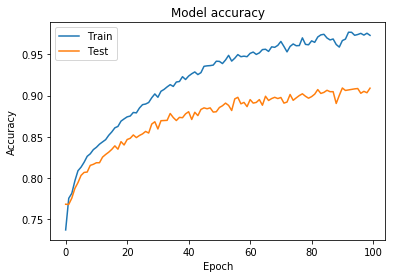

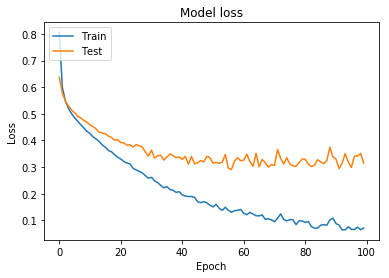

In [153]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# CROSS VALIDATION SCORES

In [154]:
gnb_scores_lag = cross_val_score(clf_gnb_lag, data_lag.iloc[:, 1:-1], data_lag.iloc[:, -1], cv=10)
print("Accuracy GNB: %0.2f (+/- %0.2f)" % (gnb_scores_lag.mean(), gnb_scores_lag.std() * 2))
knn_scores_lag = cross_val_score(clf_knn_lag, data_lag.iloc[:, 1:-1], data_lag.iloc[:, -1], cv=10)
print("Accuracy kNN: %0.2f (+/- %0.2f)" % (knn_scores_lag.mean(), knn_scores_lag.std() * 2))
#mnr_scores = cross_val_score(clf_mnr, data.iloc[:, 1:-1], data.iloc[:, -1], cv=10)
#print("Accuracy MNR: %0.2f (+/- %0.2f)" % (mnr_scores.mean(), mnr_scores.std() * 2))
#svm_scores_lag = cross_val_score(clf_svm_lag, data_lag.iloc[:, 1:-1], data_lag.iloc[:, -1], cv=10)
#print("Accuracy SVM: %0.2f (+/- %0.2f)" % (svm_scores_lag.mean(), svm_scores_lag.std() * 2))
lda_scores_lag = cross_val_score(clf_lda_lag, data_lag.iloc[:, 1:-1], data_lag.iloc[:, -1], cv=10)
print("Accuracy LDA: %0.2f (+/- %0.2f)" % (lda_scores_lag.mean(), lda_scores_lag.std() * 2))
qda_scores_lag = cross_val_score(clf_qda_lag, data_lag.iloc[:, 1:-1], data_lag.iloc[:, -1], cv=10)
print("Accuracy QDA: %0.2f (+/- %0.2f)" % (qda_scores_lag.mean(), qda_scores_lag.std() * 2))

Accuracy GNB: 0.55 (+/- 0.18)
Accuracy kNN: 0.65 (+/- 0.07)
Accuracy LDA: 0.75 (+/- 0.12)
Accuracy QDA: 0.73 (+/- 0.08)


# BALANCED DATA

In [170]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(data_lag.iloc[:,1:-1], data_lag.iloc[:,-1].values.ravel())

In [176]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.2, random_state=0)
X_train_res_scaled = preprocessing.scale(X_train_res)
X_test_res_scaled = preprocessing.scale(X_test_res)

In [195]:
from collections import Counter
print(sorted(Counter(y_train_res).items()))
print(y_train_res.shape)
y_train_res_onehot = keras.utils.to_categorical(y_train_res, num_classes=5)

[(0, 14564), (1, 14525), (2, 14497), (3, 14506), (4, 14448)]
(72540,)


In [178]:
model = Sequential()
model.add(Dense(100, input_dim=135, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [179]:
history = model.fit(X_train_res_scaled, y_train_res_onehot, validation_split=0.25, epochs=100, batch_size=256, verbose=False)



In [181]:
y_pred_res_NN3 = model.predict_classes(X_test_res_scaled)
(y_pred_res_NN3 == y_test_res).sum() / len(y_pred_res_NN3)

0.9879790460435621

In [182]:
(y_pred_res_NN3 != 0).sum()

14726

In [183]:
(y_pred_res_NN3 != 0).sum() / (y_test_res != 0).sum()

1.0111233177698435

In [185]:
(y_pred_res_NN3[np.where(y_pred_res_NN3 != 0)] == y_test_res[np.where(y_pred_res_NN3 != 0)]).sum() / len((y_pred_res_NN3[np.where(y_pred_res_NN3 != 0)]))


0.9870976504142334

# CV NN3

In [190]:
def model_4():
    model = Sequential()
    model.add(Dense(100, input_dim=135, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [191]:
estimator = KerasClassifier(build_fn=model_4, epochs=100, batch_size=256, verbose=False)

In [192]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [193]:
results = cross_val_score(estimator, X_train_res_scaled, y_train_res_onehot, cv=kfold)
print("Model_4: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model_4: 98.44% (0.15%)
